In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Jun 22 11:12:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 4.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=251bc20c53c2c146035dee032067a716a019eadcc05ec21846870115f5808cc5
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir '/root/.kaggle/'
!cp '/content/drive/MyDrive/kaggle.json' '/root/.kaggle/kaggle.json'
!chmod 600 '/root/.kaggle/kaggle.json'

In [ ]:
!kaggle datasets download --force -d debashishsau/aslamerican-sign-language-aplhabet-dataset

100% 4.19G/4.20G [00:41<00:00, 110MB/s] 
100% 4.20G/4.20G [00:41<00:00, 109MB/s]


In [ ]:
!unzip /content/aslamerican-sign-language-aplhabet-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2863).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2864).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2865).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2866).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2867).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2868).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2869).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (287).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2870).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2871).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2872).jpg  
  inflating: ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2873).jpg  
  inflating: A

In [ ]:
# split data from train folder to train/test/validation(train dataset has a lot of data and test data is just 29 images)
import splitfolders

splitfolders.ratio('/content/ASL_Alphabet_Dataset/asl_alphabet_train', output='/content/Dataset', ratio=(.7, .0, .3), group_prefix=None, move=False) # 70% train, 0% val, 30% test

Copying files: 223074 files [00:30, 7328.11 files/s]


# Preprocessing 

In [ ]:
import tensorflow as tf
print(tf.__version__)

train_dir = '/content/Dataset/train'
test_dir = '/content/Dataset/test'

batch_size = 64
img_height = 100
img_width = 100

seed = 123

#img_height = 200
#img_width = 200

#img_height = 224
#img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset = 'training',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical' # categorical because model uses a categorical_crossentropy
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset = 'validation',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

num_of_classes = len(train_ds.class_names)
print(train_ds.class_names)

2.8.2
Found 156140 files belonging to 29 classes.
Using 124912 files for training.
Found 156140 files belonging to 29 classes.
Using 31228 files for validation.
Found 66934 files belonging to 29 classes.
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


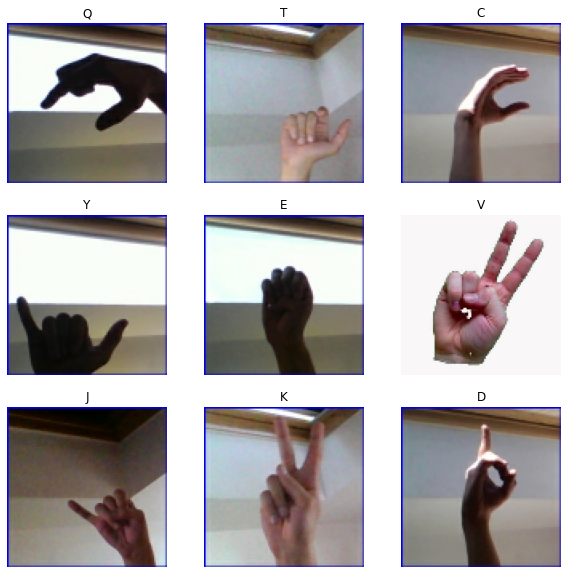

In [ ]:
# display data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(train_ds.class_names[np.argmax(labels[i])])
    plt.axis('off')

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 29), dtype=tf.float32, name=None))

In [ ]:
# augmentation layers for the training
data_augmentation = tf.keras.Sequential()
#data_augmentation.add(tf.keras.layers.RandomFlip())
data_augmentation.add(tf.keras.layers.RandomZoom((0.1,0.15), fill_mode='nearest'))
data_augmentation.add(tf.keras.layers.RandomRotation(0.05, fill_mode='nearest'))
data_augmentation.add(tf.keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest'))

def prepare_ds(preprocessing, augmentation = None):

  if augmentation:
    def f(x, y):
      return preprocessing(augmentation(x, training=True)), y
      #return augmentation(x, training=True), y

    return f
  else:
    def f(x, y):
      return preprocessing(x), y

    return f

In [ ]:
# preprocesing for ResNet50
from keras.applications.resnet import preprocess_input as resnet50_preprocessing

train_ds = (
    train_ds
    .map(prepare_ds(resnet50_preprocessing, data_augmentation), num_parallel_calls=tf.data.AUTOTUNE) # apply data_augmentation only on the train_ds
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    val_ds
    .map(prepare_ds(resnet50_preprocessing), num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    test_ds
    .map(prepare_ds(resnet50_preprocessing), num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

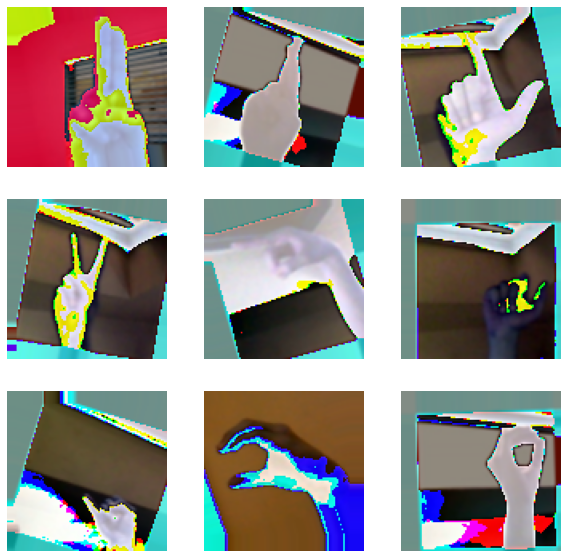

In [ ]:
# display data
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    #plt.title(train_ds.class_names[np.argmax(labels[i])])
    plt.axis('off')

# ResNet50

In [ ]:
# ResNet50 model
from keras.applications.resnet import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# hyperparameters tuning
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 7.7 MB/s 


In [ ]:
import keras_tuner as kt

def model_builder(hp):

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  hp_units = hp.Int('units', min_value=128, max_value=256, step=128)

  # define top model

  top_model = tf.keras.models.Sequential()
  top_model.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:]))
  top_model.add(tf.keras.layers.Dense(hp_units, activation='relu'))
  top_model.add(tf.keras.layers.Dense(hp_units, activation='relu'))
  top_model.add(tf.keras.layers.Dense(num_of_classes, activation='softmax'))

  model = tf.keras.models.Sequential() 
  model.add(base_model)
  model.add(top_model)

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['categorical_accuracy'])
  
  return model 

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_categorical_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/asl_recognition',
                     project_name='ASL_recognition_resnet50', overwrite=True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(train_ds, validation_data=val_ds, epochs=50, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 6 Complete [00h 07m 52s]
val_categorical_accuracy: 0.8350198268890381

Best val_categorical_accuracy So Far: 0.8350198268890381
Total elapsed time: 00h 48m 05s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_ds, validation_data=val_ds, epochs=50) # train model with optimal parameters

val_acc_per_epoch = history.history['val_categorical_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1 # find optimal number of epochs
print('Best epoch: %d' % (best_epoch,))

hypermodel = tuner.hypermodel.build(best_hps)

history = hypermodel.fit(train_ds, validation_data=val_ds, epochs=best_epoch)

Epoch 1/50
1952/1952 [==============================] - 239s 120ms/step - loss: 0.8744 - categorical_accuracy: 0.7268 - val_loss: 0.6702 - val_categorical_accuracy: 0.7926
Epoch 2/50
1952/1952 [==============================] - 228s 117ms/step - loss: 0.3147 - categorical_accuracy: 0.8945 - val_loss: 0.5023 - val_categorical_accuracy: 0.8420
Epoch 3/50
1952/1952 [==============================] - 232s 118ms/step - loss: 0.2161 - categorical_accuracy: 0.9264 - val_loss: 0.4332 - val_categorical_accuracy: 0.8613
Epoch 4/50
1952/1952 [==============================] - 231s 118ms/step - loss: 0.1683 - categorical_accuracy: 0.9422 - val_loss: 0.4307 - val_categorical_accuracy: 0.8651
Epoch 5/50
1952/1952 [==============================] - 231s 118ms/step - loss: 0.1391 - categorical_accuracy: 0.9523 - val_loss: 0.3674 - val_categorical_accuracy: 0.8854
Epoch 6/50
1952/1952 [==============================] - 227s 116ms/step - loss: 0.1212 - categorical_accuracy: 0.9589 - val_loss: 0.3733 - v

In [ ]:
hypermodel.save('/content/drive/MyDrive/best_resnet_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/best_resnet_model/assets


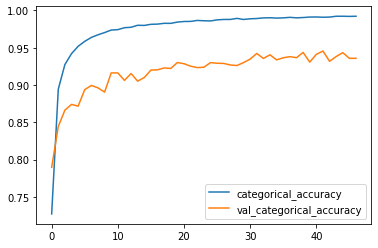

In [ ]:
# learning curves
plt.plot(history.history['categorical_accuracy'], label = 'categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'val_categorical_accuracy')

plt.legend()
plt.show()

In [ ]:
eval_result = hypermodel.evaluate(test_ds)

1046/1046 [==============================] - 59s 56ms/step - loss: 0.2368 - categorical_accuracy: 0.9346


# MobileNet

In [ ]:
# load unpreprocessed data
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset = 'training',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical' # categorical because model uses a categorical_crossentropy
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset = 'validation',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# preprocesing for MobileNet
from keras.applications.mobilenet import preprocess_input as mobilenet_preprocessing

train_ds = (
    train_ds
    .map(prepare_ds(mobilenet_preprocessing, data_augmentation), num_parallel_calls=tf.data.AUTOTUNE) # apply data_augmentation only on the train_ds
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    val_ds
    .map(prepare_ds(mobilenet_preprocessing), num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    test_ds
    .map(prepare_ds(mobilenet_preprocessing), num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)


Found 156140 files belonging to 29 classes.
Using 124912 files for training.
Found 156140 files belonging to 29 classes.
Using 31228 files for validation.
Found 66934 files belonging to 29 classes.


In [ ]:
# loading new base model
from keras.applications.mobilenet import MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
import keras_tuner as kt

def model_builder(hp):

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  hp_units = hp.Int('units', min_value=128, max_value=256, step=128)

  # define top model

  top_model = tf.keras.models.Sequential()
  top_model.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:]))
  top_model.add(tf.keras.layers.Dense(hp_units, activation='relu'))
  top_model.add(tf.keras.layers.Dense(hp_units, activation='relu'))
  top_model.add(tf.keras.layers.Dense(num_of_classes, activation='softmax'))

  model = tf.keras.models.Sequential() 
  model.add(base_model)
  model.add(top_model)

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['categorical_accuracy'])
  
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_categorical_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/asl_recognition2',
                     project_name='ASL_recognition_mobilenet', overwrite=True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(train_ds, validation_data=val_ds, epochs=50, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 6 Complete [00h 06m 06s]
val_categorical_accuracy: 0.7923337817192078

Best val_categorical_accuracy So Far: 0.8899385333061218
Total elapsed time: 00h 37m 27s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_ds, validation_data=val_ds, epochs=50) # train model with optimal parameters

val_acc_per_epoch = history.history['val_categorical_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1 # find optimal number of epochs
print('Best epoch: %d' % (best_epoch,))

hypermodel = tuner.hypermodel.build(best_hps) 

history = hypermodel.fit(train_ds, validation_data=val_ds, epochs=best_epoch)

Epoch 1/50
1952/1952 [==============================] - 185s 94ms/step - loss: 0.6533 - categorical_accuracy: 0.8001 - val_loss: 0.4355 - val_categorical_accuracy: 0.8582
Epoch 2/50
1952/1952 [==============================] - 182s 93ms/step - loss: 0.2538 - categorical_accuracy: 0.9180 - val_loss: 0.3091 - val_categorical_accuracy: 0.8980
Epoch 3/50
1952/1952 [==============================] - 182s 93ms/step - loss: 0.1776 - categorical_accuracy: 0.9418 - val_loss: 0.2852 - val_categorical_accuracy: 0.9026
Epoch 4/50
1952/1952 [==============================] - 182s 93ms/step - loss: 0.1398 - categorical_accuracy: 0.9545 - val_loss: 0.2539 - val_categorical_accuracy: 0.9141
Epoch 5/50
1952/1952 [==============================] - 181s 92ms/step - loss: 0.1151 - categorical_accuracy: 0.9625 - val_loss: 0.2225 - val_categorical_accuracy: 0.9272
Epoch 6/50
1952/1952 [==============================] - 182s 93ms/step - loss: 0.1004 - categorical_accuracy: 0.9671 - val_loss: 0.2234 - val_cat

In [ ]:
hypermodel.save('/content/drive/MyDrive/best_mobilenet_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/best_mobilenet_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/best_mobilenet_model/assets


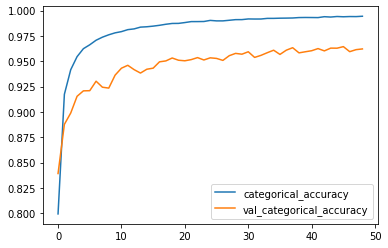

In [ ]:
# learning curves
plt.plot(history.history['categorical_accuracy'], label = 'categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'val_categorical_accuracy')

plt.legend()
plt.show()

In [ ]:
eval_result = hypermodel.evaluate(test_ds)

##VGG16

In [ ]:
# load unpreprocessed data
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset = 'training',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical' # categorical because model uses a categorical_crossentropy
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset = 'validation',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# preprocesing for VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocessing

train_ds = (
    train_ds
    .map(prepare_ds(vgg16_preprocessing, data_augmentation), num_parallel_calls=tf.data.AUTOTUNE) # apply data_augmentation only on the train_ds
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    val_ds
    .map(prepare_ds(vgg16_preprocessing), num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    test_ds
    .map(prepare_ds(vgg16_preprocessing), num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

Found 156140 files belonging to 29 classes.
Using 124912 files for training.
Found 156140 files belonging to 29 classes.
Using 31228 files for validation.
Found 66934 files belonging to 29 classes.


In [ ]:
# loading new base model
from keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
import keras_tuner as kt

def model_builder(hp):

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
  hp_units1 = hp.Int('units1', min_value=128, max_value=512, step=128)
  hp_units2 = hp.Int('units2', min_value=128, max_value=hp_units1, step=128)

  # define top model

  top_model = tf.keras.models.Sequential()
  top_model.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:]))
  top_model.add(tf.keras.layers.Dense(hp_units1, activation='relu'))
  top_model.add(tf.keras.layers.Dense(hp_units2, activation='relu'))
  top_model.add(tf.keras.layers.Dense(num_of_classes, activation='softmax'))

  model = tf.keras.models.Sequential() 
  model.add(base_model)
  model.add(top_model)

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['categorical_accuracy'])
  
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_categorical_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/asl_recognition3',
                     project_name='ASL_recognition_vgg16', overwrite=True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(train_ds, validation_data=val_ds, epochs=50, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 22 Complete [00h 13m 07s]
val_categorical_accuracy: 0.03727424144744873

Best val_categorical_accuracy So Far: 0.7952478528022766
Total elapsed time: 03h 17m 59s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_ds, validation_data=val_ds, epochs=50) # train model with optimal parameters

val_acc_per_epoch = history.history['val_categorical_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1 # find optimal number of epochs
print('Best epoch: %d' % (best_epoch,))

hypermodel = tuner.hypermodel.build(best_hps) 

history = hypermodel.fit(train_ds, validation_data=val_ds, epochs=best_epoch)

In [ ]:
hypermodel.save('/content/drive/MyDrive/best_vgg16_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/best_vgg16_model/assets


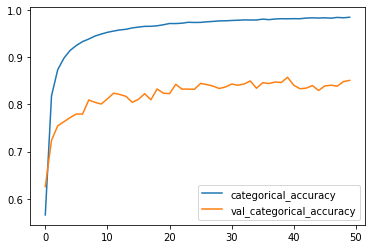

In [ ]:
# learning curves
plt.plot(history.history['categorical_accuracy'], label = 'categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'val_categorical_accuracy')

plt.legend()
plt.show()

In [ ]:
eval_result = hypermodel.evaluate(test_ds)

1046/1046 [==============================] - 44s 42ms/step - loss: 1.1493 - categorical_accuracy: 0.6376
